# Before we start
[Docker 101](https://colab.research.google.com/drive/1bfu7h8YB3TMNnWGbBT3Vsrx-XJwPPd-x?usp=sharing)

# Ollama - Docker for LLMs

Ollama allows you to host various popular language models directly on your computer without relying on cloud services. This setup provides privacy, reduces latency, and eliminates the costs associated with external hosting providers.

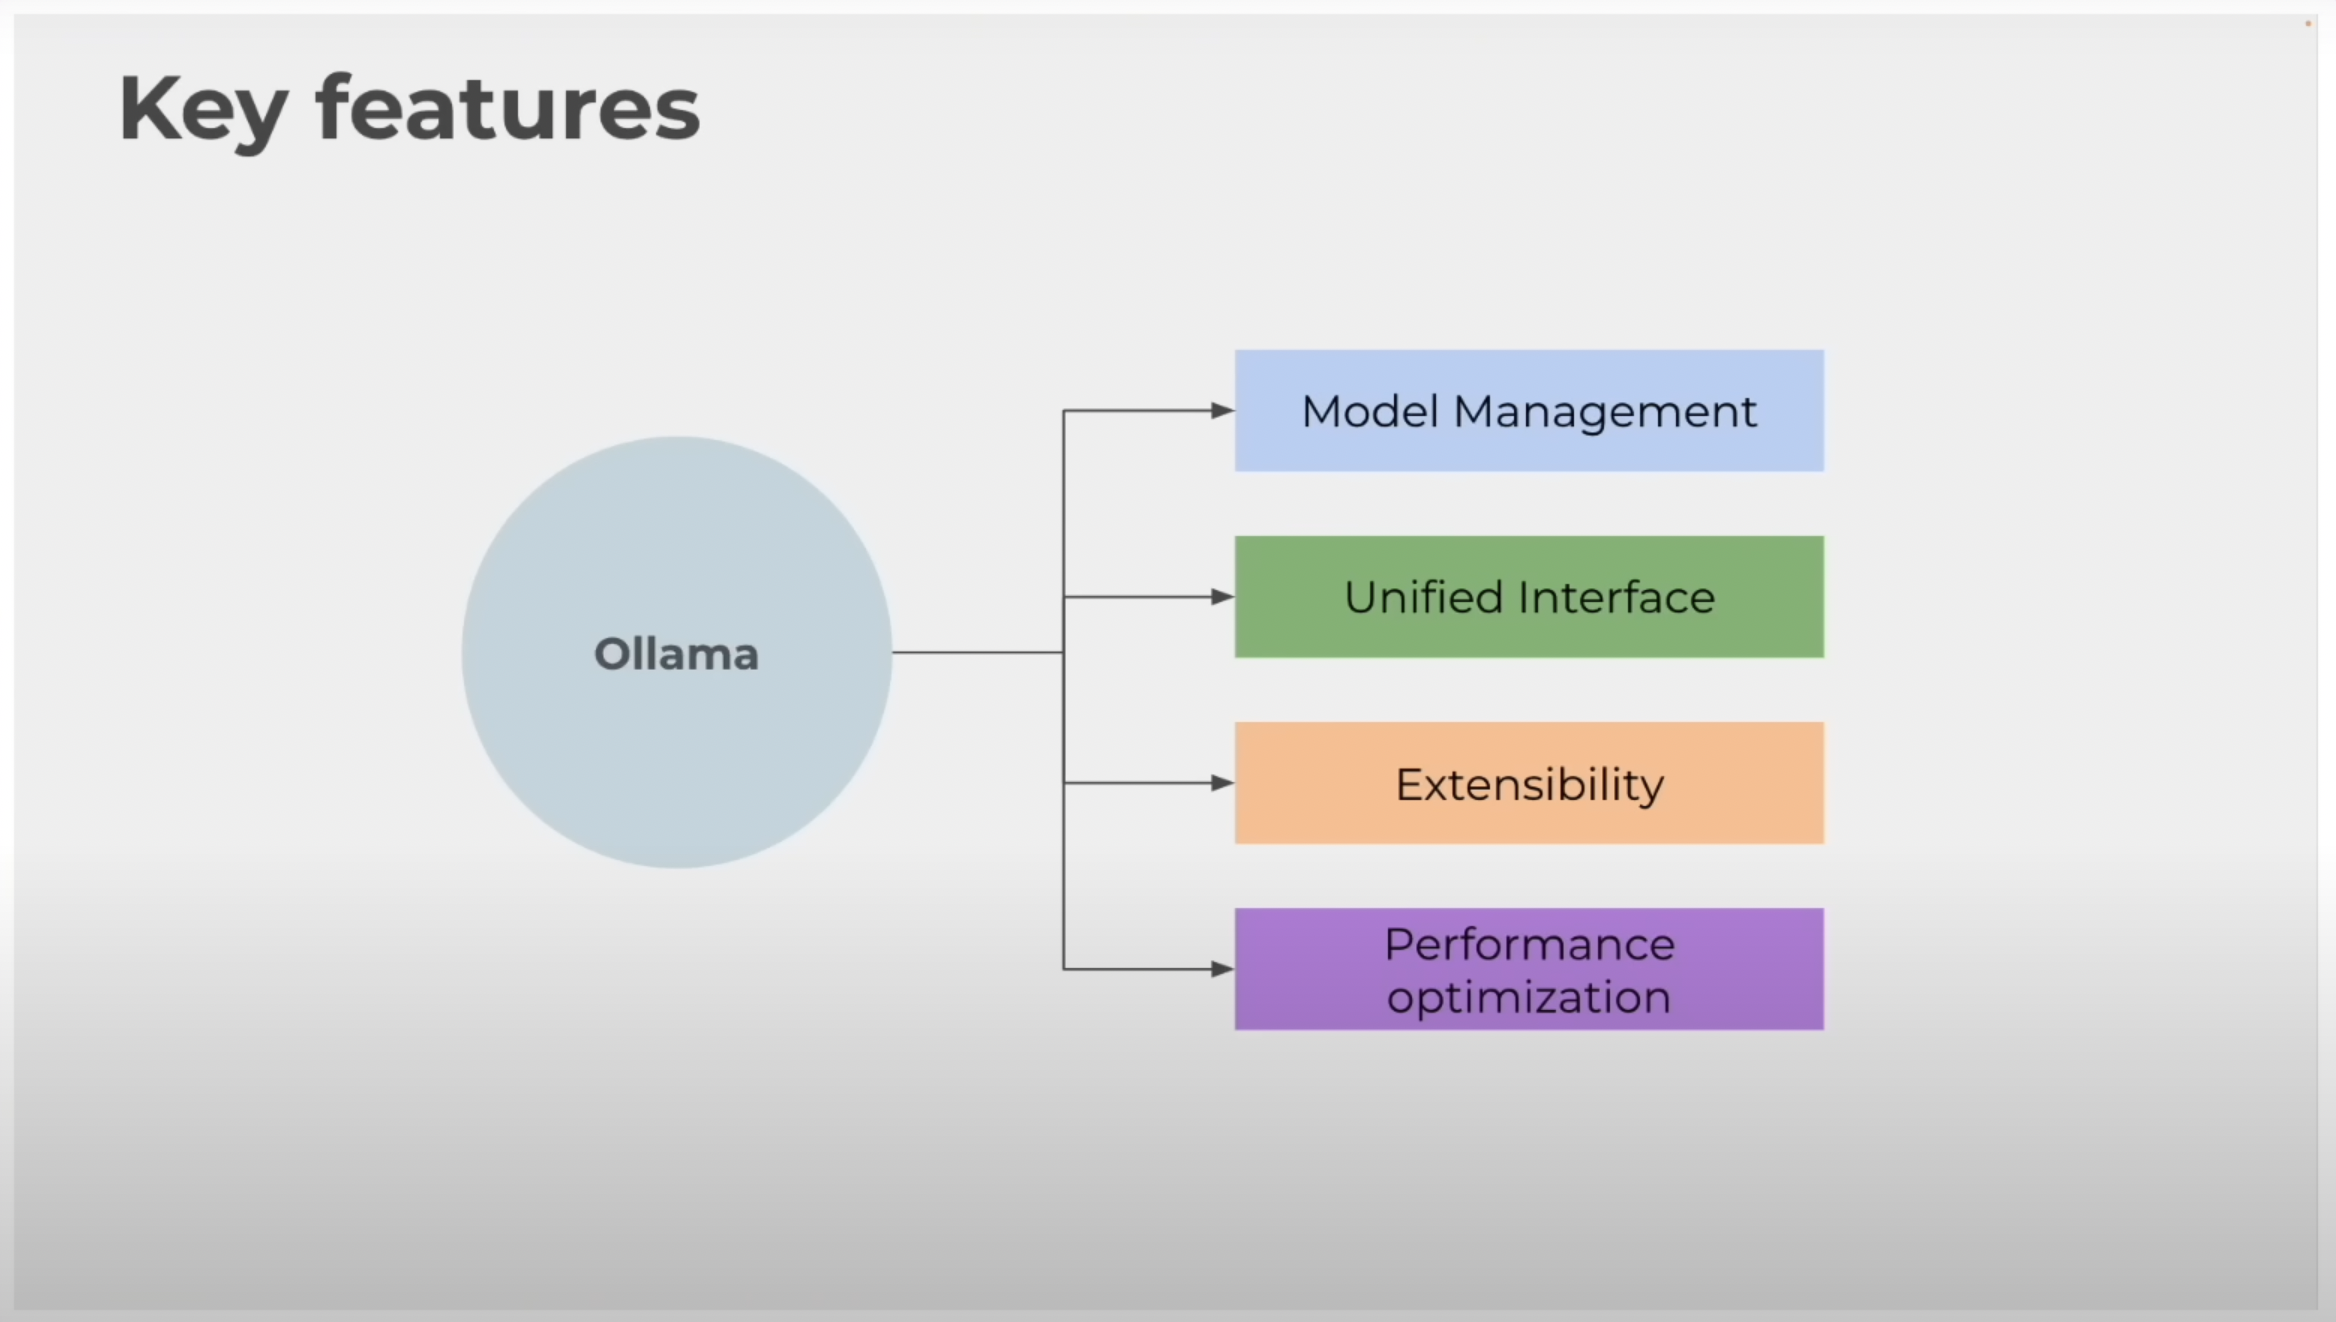



## Installation

#### macOS:
- Visit the [Ollama download page](https://ollama.com/).
- Download the macOS installer.
- Open the installer and follow prompts.

#### Windows:
- Visit the [Ollama download page](https://ollama.com/).
- Download the Windows installer.
- Run the installer, following the guided setup.

#### Linux:
Execute in terminal:
```bash
curl -fsSL https://ollama.com/install.sh | sh
```



### Verifying Installation
Check Ollama’s version to verify installation:
```bash
ollama --version
```


### Running Ollama Server
Initiate the server using:
```bash
ollama serve
```
This starts the Ollama server locally.

## Preferred way of Installation


### 1. Create a Docker Network:
```bash
docker network create ollama-net
```
- Creates an isolated Docker network named `ollama-net`. Containers attached to this network can communicate directly.



### 2. Pull the Docker Image:
```bash
docker pull ollama/ollama
```
- Downloads the latest `ollama/ollama` Docker image from Docker Hub to your local machine.



### 3. Run the Ollama Docker Container:
```bash
docker run -d --network ollama-net -v ollama:/root/.ollama  -p 11434:11434 --name ollama ollama/ollama
```
- Runs a Docker container in detached mode (`-d`) named `ollama`.
- Connects the container to the previously created Docker network (`ollama-net`).
- Mounts a Docker-managed volume named `ollama` to the container directory `/root/.ollama`, persisting data across restarts.
- Maps container port `11434` to host port `11434`, exposing Ollama's API or web interface externally.



### 4. Run the LLaMA model inside the container:
```bash
docker exec -it ollama ollama run phi3:mini
```
- Executes the command `ollama run phi3:mini` inside the running `ollama` container.
- This downloads and starts the `phi3:mini` model, providing an interactive session (`-it`) with the model through your terminal.



These commands set up a self-contained Dockerized environment running Ollama.


## Managing Models


### Discovering Models
Let's visit [Ollama’s Model Library](https://ollama.com/library) to see available models.


### Downloading Models
Download models using:
```bash
ollama pull llama3.2
```
Replace `llama3.2` with your preferred model.



### Running Models
Start interactive sessions:
```bash
ollama run llama3.2
```

### Removing models
```bash
ollama rm llama3.2
```

### Show model info
```bash
ollama show llama3.2
```

### List models on your computer

```bash
ollama list
```

## Interact with Models

### 2. API
Streaming
```bash
curl http://ollama:11434/api/generate -d '{"model": "phi4", "prompt": "why is the sky blue?"}'
```

Non-streaming
```bash
curl http://ollama:11434/api/generate -d '{"model": "llama3.2", "prompt": "why is the sky blue?", "stream": false}'
```

API Reference: https://github.com/ollama/ollama/blob/main/docs/api.md

```bash
curl http://ollama:11434/api/generate -d '{ "model": "llama3.2", "prompt": "What color is the sky at different times of the day? Respond using JSON", "format": "json", "stream": false}'
```

```bash
curl http://localhost:11434/api/generate -d '{
  "model": "llama3.2",
  "prompt": "Why is the sky blue?",
  "stream": false,
  "options": {
    "num_keep": 5,
    "seed": 42,
    "num_predict": 100,
    "top_k": 20,
    "top_p": 0.9,
    "min_p": 0.0,
    "typical_p": 0.7,
    "repeat_last_n": 33,
    "temperature": 0.8,
    "repeat_penalty": 1.2,
    "presence_penalty": 1.5,
    "frequency_penalty": 1.0,
    "mirostat": 1,
    "mirostat_tau": 0.8,
    "mirostat_eta": 0.6,
    "penalize_newline": true,
    "stop": ["\n", "user:"],
    "numa": false,
    "num_ctx": 1024,
    "num_batch": 2,
    "num_gpu": 1,
    "main_gpu": 0,
    "low_vram": false,
    "vocab_only": false,
    "use_mmap": true,
    "use_mlock": false,
    "num_thread": 8
  }
}'
```

### 3. Python

#### Installation
Install the Python library:
```bash
pip install ollama
```

#### Basic Usage
Sample script:
```python
from ollama import chat

response = chat(model='llama3.2', messages=[{'role': 'user', 'content': 'Why is the sky blue?'}])
print(response['message']['content'])
```


Play here: https://github.com/ollama/ollama-python/tree/main/examples

## MODELFILE

Ollama's `Modelfile` serves as a blueprint for creating and sharing models within the Ollama framework. It allows users to define model configurations, parameters, and behaviors in a structured manner, facilitating customization and efficient model management.

**Understanding the Modelfile Structure**

A `Modelfile` is composed of various instructions, each serving a specific purpose:

- **FROM (Required):** Specifies the base model to use.
- **PARAMETER:** Sets parameters that influence model behavior.
- **TEMPLATE:** Defines the prompt template sent to the model.
- **SYSTEM:** Specifies system messages to guide the model's responses.
- **ADAPTER:** Applies (Q)LoRA adapters to the model.
- **LICENSE:** Specifies the legal license for the model.
- **MESSAGE:** Defines message history for context.

**Creating a Basic Modelfile**

To create a custom model, follow these steps:

1. **Define the Base Model:**

   Begin by specifying the base model using the `FROM` instruction.

   ```plaintext
   FROM llama3.2
   ```


2. **Set Model Parameters:**

   Customize the model's behavior by setting parameters such as temperature and context window size.

   ```plaintext
   PARAMETER temperature 1
   PARAMETER num_ctx 4096
   ```


3. **Add a System Message:**

   Define a system message to guide the model's responses.

   ```plaintext
   SYSTEM You are Jarvis from Iron Man, acting as an assistant.
   ```


Combining these instructions, your `Modelfile` would look like this:


```plaintext
FROM llama3.2
PARAMETER temperature 1
PARAMETER num_ctx 4096
SYSTEM You are Jarvis from Iron Man, acting as an assistant.
```


**Implementing the Modelfile**

After creating your `Modelfile`, implement it using the following commands:

1. **Create the Model:**

   ```bash
   ollama create jarvis-assistant -f ./Modelfile
   ```


2. **Run the Model:**

   ```bash
   ollama run jarvis-assistant
   ```


This setup allows you to interact with the model as if conversing with Jarvis from Iron Man.




```bash
ollama show --modelfile llama3.2
```


This command displays the structure and parameters of the specified model, aiding in understanding and further customization.

**Note**

Ollama's `Modelfile` is a powerful tool for customizing and managing models within the Ollama framework. By understanding its structure and instructions, users can tailor models to specific applications, enhancing the versatility and effectiveness of their AI implementations.